In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ehrapy as ep
from tableone import TableOne
import seaborn as sns
import scanpy as sc

# generate dataset
rng = np.random.default_rng(151)

random_dataset = pd.DataFrame(
    {
        "haircolor": rng.choice(["blond", "black", "colored"], size=150),
        "height": rng.integers(low=160, high=190, size=150),
        # "proficiency": rng.choice(["high prof.", "limited prof."], size=150),
    }
)
random_dataset.head()

,haircolor,height
0,colored,179
1,black,165
2,colored,174
3,black,173
4,colored,181


In [72]:
# generate dataset
rng = np.random.default_rng(151)

random_dataset = pd.DataFrame(
    {
        "haircolor": rng.choice(["blond", "black", "colored"], size=150),
        "height": rng.integers(low=173, high=178, size=150),
        # "proficiency": rng.choice(["high prof.", "limited prof."], size=150),
    }
)
random_dataset.head()

,haircolor,height
0,colored,176
1,black,173
2,colored,175
3,black,175
4,colored,176


In [57]:
1.0 * random_dataset["height"].nunique() / random_dataset["height"].count()

In [76]:
TableOne(random_dataset, categorical=["haircolor"])

Missing      Overall
n                                          150
haircolor, n (%)  black         0    45 (30.0)
                  blond              55 (36.7)
                  colored            50 (33.3)
height, mean (SD)               0  175.0 (1.5)

In [59]:
adata = sc.AnnData(X=rng.normal(size=(150, 100)), obs=random_dataset)
adata.obs

,haircolor,height
0,colored,176
1,black,173
2,colored,175
3,black,175
4,colored,176
...,...,...
145,blond,173
146,black,177
147,black,173
148,blond,174


In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
pl = ep.tl.PopulationTracker(adata)
pl(adata)
adata = adata[:75]
pl(adata, label="filtered", operations_done="filtered to first 75 entries")

In [62]:
pl._tracked_operations

[None, 'filtered to first 75 entries']

In [63]:
# pl.reset()

In [64]:
pl.tracked_steps

In [65]:
pl.track

{'haircolor': {'black': [30.0, 25.3],
  'blond': [36.7, 40.0],
  'colored': [33.3, 34.7]},
 'height': []}

KeyError: 0

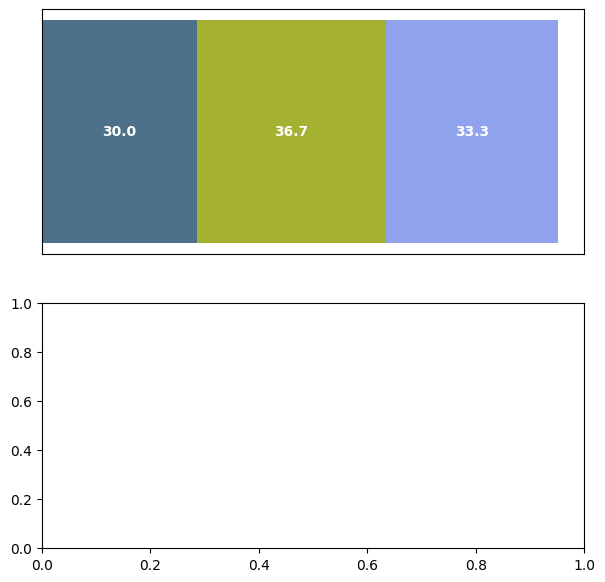

In [66]:
fig, axes = pl.plot_population_change(return_plot=True)

2024-02-14 11:07:38,156 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `101766` x `47`.


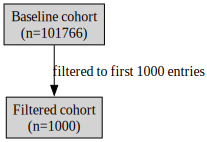

In [67]:
adata = ep.dt.diabetes_130(columns_obs_only=["gender", "race", "weight", "age"])
pop_track = ep.tl.PopulationTracker(adata)
pop_track(adata, label="Baseline cohort")
adata = adata[:1000]
pop_track(adata, label="Filtered cohort", operations_done="filtered to first 1000 entries")
pop_track.plot_flowchart(save="flowchart.png")

In [68]:
adata = ep.dt.diabetes_130(columns_obs_only=["gender", "race", "weight", "age"])
adata.obs.gender = adata.obs.gender.astype("category")

2024-02-14 11:07:40,029 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `101766` x `47`.


In [69]:
adata = ep.dt.diabetes_130(columns_obs_only=["gender", "race", "weight", "age"])
adata.obs.weight.value_counts()

2024-02-14 11:07:40,619 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `101766` x `47`.


weight
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: count, dtype: int64

In [70]:
adata.X[1, :]

array([55629189, 'Emergency', 'Discharged to home', ' Emergency Room', 3,
       nan, nan, 59, 0, 18, 0, 0, 0,
       'endocrine/nutritional/metabolic diseases and immunity disorders',
       'diabetes',
       'endocrine/nutritional/metabolic diseases and immunity disorders',
       9, nan, nan, 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Up', 'No', 'No',
       'No', 'No', 'No', True, True, '>30', 15.0, nan], dtype=object)

In [71]:
adata = ep.dt.diabetes_130()
adata[]]

SyntaxError: unmatched ']' (2079747778.py, line 2)

In [253]:
adata.X[:, adata.var_names == "time_in_hospital_days"]

array([[1],
       [3],
       [2],
       ...,
       [1],
       [10],
       [6]], dtype=object)

In [78]:
adata = ep.dt.diabetes_130(columns_obs_only=["gender", "race", "weight", "time_in_hospital_days"])
adata.obs.time_in_hospital_days = adata.obs.time_in_hospital_days.astype("float") + np.random.random(adata.n_obs)
print(adata.obs.dtypes)
TableOne(adata.obs)

2024-02-14 11:15:44,787 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `101766` x `47`.
gender                    float64
race                     category
weight                   category
time_in_hospital_days     float64
dtype: object


Missing       Overall
n                                                               101766
gender, n (%)                    0.0                   3  54708 (53.8)
                                 1.0                      47055 (46.2)
race, n (%)                      AfricanAmerican    2273  19210 (19.3)
                                 Asian                       641 (0.6)
                                 Caucasian                76099 (76.5)
                                 Hispanic                   2037 (2.0)
                                 Other                      1506 (1.5)
weight, n (%)                    >200              98569       3 (0.1)
                                 [0-25)                       48 (1.5)
                                 [100-125)                  625 (19.5)
                                 [125-150)                   145 (4.5)
                                 [150-175)                    35 (1.1)
                                 [175-200)                    11 (0.3)
                                 [25-50)                      97 (3.0)
                                 [50-75)                    897 (28.1)
                                 [75-100)                  1336 (41.8)
time_in_hospital_days, mean (SD)                       0     4.9 (3.0)

2024-02-14 13:01:31,453 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `101766` x `48`.


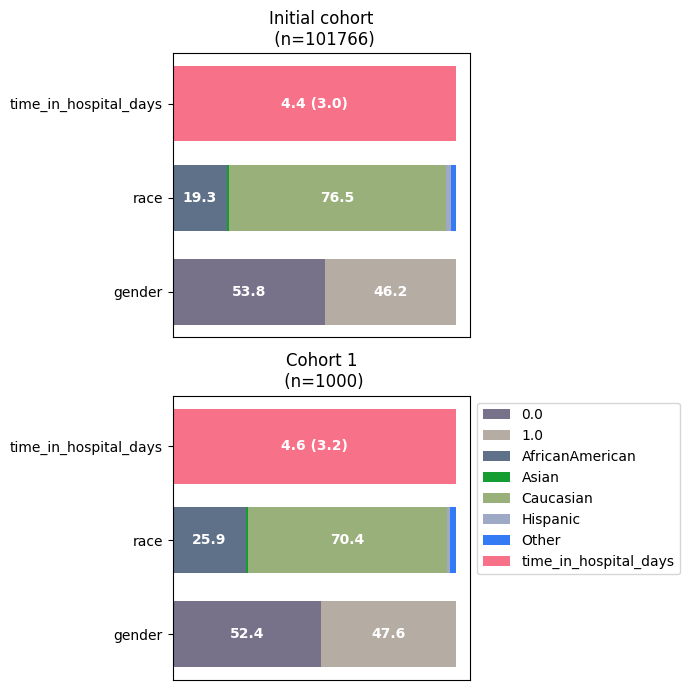

In [156]:
adata = ep.dt.diabetes_130(columns_obs_only=["gender", "race", "time_in_hospital_days"])
pop_track = ep.tl.PopulationTracker(adata, categorical=["gender", "race"])
pop_track(adata, label="Initial cohort")
adata = adata[:1000]
pop_track(adata, label="Cohort 1", operations_done="filtered to first 1000 entries")
pop_track.plot_population_change(
    subfigure_title=True, subplots_kwargs={"figsize": (7, 7)}, legend_kwargs={"bbox_to_anchor": (1, 1)}
)

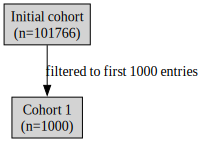

In [127]:
pop_track.plot_flowchart()

In [107]:
pop_track.track

{'gender': {0.0: [53.8, 52.4], 1.0: [46.2, 47.6]},
 'race': {'AfricanAmerican': [19.3, 25.9],
  'Asian': [0.6, 0.7],
  'Caucasian': [76.5, 70.4],
  'Hispanic': [2.0, 0.8],
  'Other': [1.5, 2.2]},
 'weight': {'>200': [0.1, 0],
  '[0-25)': [1.5, 0],
  '[100-125)': [19.5, 0],
  '[125-150)': [4.5, 0],
  '[150-175)': [1.1, 0],
  '[175-200)': [0.3, 0],
  '[25-50)': [3.0, 0],
  '[50-75)': [28.1, 0],
  '[75-100)': [41.8, 0]},
 'time_in_hospital_days': ['4.4 (3.0)', '4.6 (3.2)']}

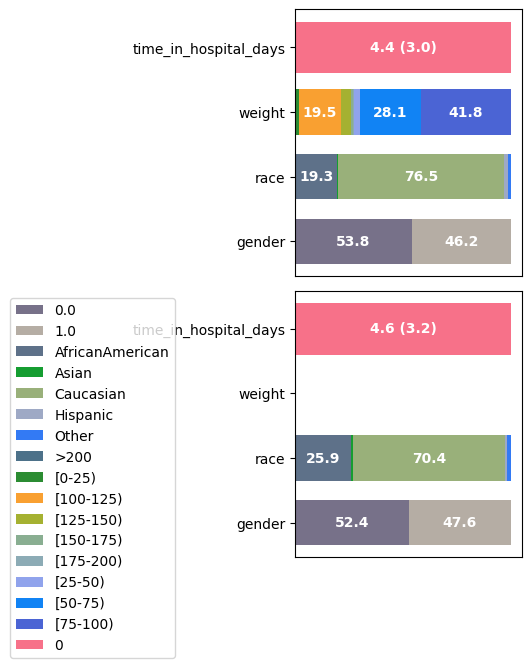

In [116]:
pop_track.plot_population_change()

In [99]:
pop_track.track

{'gender': {0.0: [53.8, 52.4], 1.0: [46.2, 47.6]},
 'race': {'AfricanAmerican': [19.3, 25.9],
  'Asian': [0.6, 0.7],
  'Caucasian': [76.5, 70.4],
  'Hispanic': [2.0, 0.8],
  'Other': [1.5, 2.2]},
 'weight': {'>200': [0.1, 0],
  '[0-25)': [1.5, 0],
  '[100-125)': [19.5, 0],
  '[125-150)': [4.5, 0],
  '[150-175)': [1.1, 0],
  '[175-200)': [0.3, 0],
  '[25-50)': [3.0, 0],
  '[50-75)': [28.1, 0],
  '[75-100)': [41.8, 0]},
 'time_in_hospital_days': ['4.4 (3.0)', '4.6 (3.2)']}

2024-02-14 11:56:20,020 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `101766` x `47`.


KeyError: 0

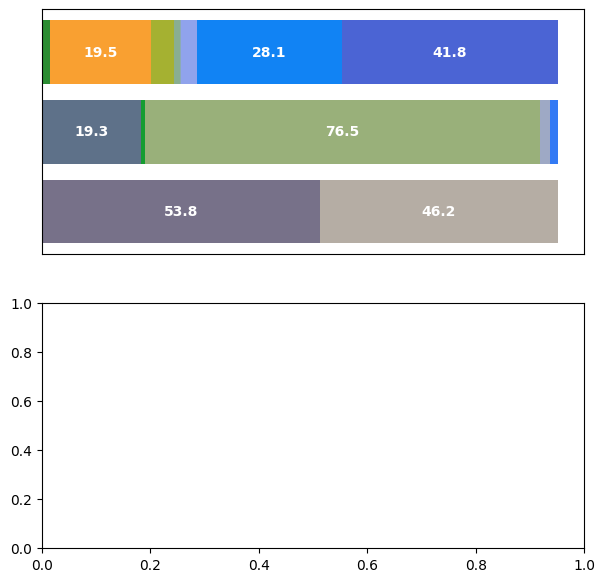

In [97]:
adata = ep.dt.diabetes_130(columns_obs_only=["gender", "race", "weight", "time_in_hospital_days"])
adata.obs.gender = adata.obs.gender.astype("category")
pop_track = ep.tl.PopulationTracker(adata, categorical=["gender", "race", "weight"])
pop_track(adata, label="Baseline cohort")
adata = adata[:1000]
pop_track(adata, label="Filtered cohort", operations_done="filtered to first 1000 entries")
pop_track.plot_population_change()

In [187]:
dot.savefig("flowchart.png")

AttributeError: 'Digraph' object has no attribute 'savefig'

In [117]:
pl.tracked_steps

In [120]:
pl._tracked_operations

[None, 'filtered nothing lol']

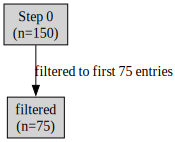

In [136]:
pl.plot_flowchart()

In [20]:
t1 = TableOne(random_dataset, columns=["ethnicity", "gender", "proficiency"])
t1

Missing    Overall
n                                               150
ethnicity, n (%)   asian               0  43 (28.7)
                   black                  52 (34.7)
                   white                  55 (36.7)
gender, n (%)      female              0  66 (44.0)
                   male                   84 (56.0)
proficiency, n (%) high prof.          0  78 (52.0)
                   limited prof.          72 (48.0)

In [151]:
collated_data = {key: values1 + values2 for key, values1, values2 in zip(dpcts.keys(), dpcts.values(), dcpts2.values())}
collated_data

{'asian': [28.7, 24.0],
 'black': [34.7, 34.0],
 'white': [36.7, 42.0],
 'male': [56.0, 56.0],
 'female': [44.0, 44.0],
 'high prof.': [52.0, 48.0],
 'limited prof.': [48.0, 52.0]}

In [155]:
data_ethnicity = {key: value for key, value in collated_data.items() if key in ["asian", "black", "white"]}
data_ethnicity

{'asian': [28.7, 24.0], 'black': [34.7, 34.0], 'white': [36.7, 42.0]}

In [191]:
data_gender = {key: value for key, value in collated_data.items() if key in ["male", "female"]}
data_gender

{'male': [56.0, 56.0], 'female': [44.0, 44.0]}

In [248]:
data_prof = {key: value for key, value in collated_data.items() if key in ["high prof.", "limited prof."]}
data_prof

{'high prof.': [52.0, 48.0], 'limited prof.': [48.0, 52.0]}

In [211]:
df_ethnicity

,asian,black,white
0,28.7,34.7,36.7


In [242]:
for v in l.iterrows():
    print(v[1].values[0])

28.7
34.7
36.7


28.7
34.7
36.7
56.0
44.0
52.0
48.0
24.0
34.0
42.0
56.0
44.0
48.0
52.0


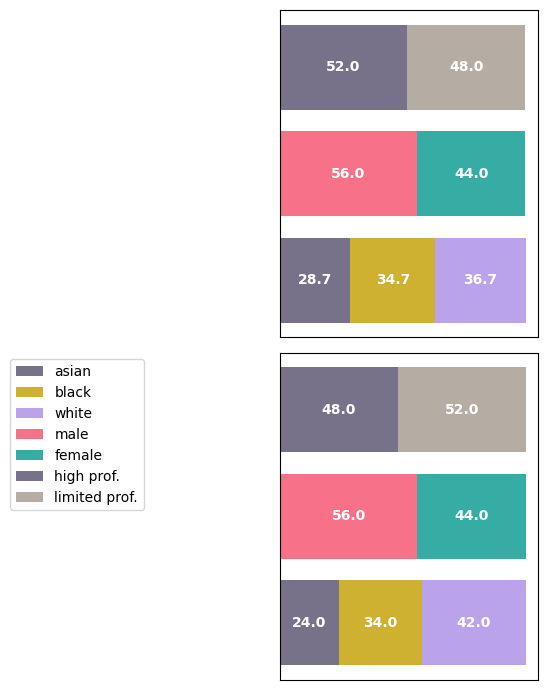

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Given data dictionaries
data_ethnicity = {"asian": [28.7, 24.0], "black": [34.7, 34.0], "white": [36.7, 42.0]}

data_gender = {"male": [56.0, 56.0], "female": [44.0, 44.0]}

data_prof = {"high prof.": [52.0, 48.0], "limited prof.": [48.0, 52.0]}

# Convert dictionaries to DataFrames
df_ethnicity = pd.DataFrame(data_ethnicity)
df_gender = pd.DataFrame(data_gender)
df_prof = pd.DataFrame(data_prof)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(7, 7))

# Plotting for the ethnicity with a small gap
categories = [df_ethnicity, df_gender, df_prof]
legend_labels = []

for idx, ax in enumerate(axes):
    for pos, data in enumerate([df_ethnicity.loc[idx], df_gender.loc[idx], df_prof.loc[idx]]):
        cumwidth = 0
        category = categories[pos]

        hue_shift = (pos + 1) / len(categories[pos])  # Adjust the hue shift based on the category position
        colors = sns.color_palette("husl", len(category.columns))
        adjusted_colors = [((color[0] + hue_shift) % 1, color[1], color[2]) for color in colors]

        for i, value in enumerate(data):
            print(value)
            # value = value[1].values[0]  # Take the value based on idx
            ax.barh(pos, value, left=cumwidth, color=adjusted_colors[i], height=0.8)

            if value > 5:
                # Add data labels
                width = value
                ax.text(
                    cumwidth + width / 2,
                    pos,
                    "{:.1f}".format(value),
                    ha="center",
                    va="center",
                    color="white",
                    fontweight="bold",
                )

            ax.set_yticks([])
            ax.set_xticks([])
            cumwidth += value

            legend_labels.append(category.columns[i])

# makes the frames invisible
# for ax in axes:
#     ax.axis('off')


# Add legend for the first subplot
plt.legend(legend_labels, loc="best", bbox_to_anchor=(-0.5, 1))  # ncol=len(legend_labels), bbox_to_anchor=(0.5, -0.3)

plt.tight_layout()
plt.show()

AttributeError: 'str' object has no attribute 'values'

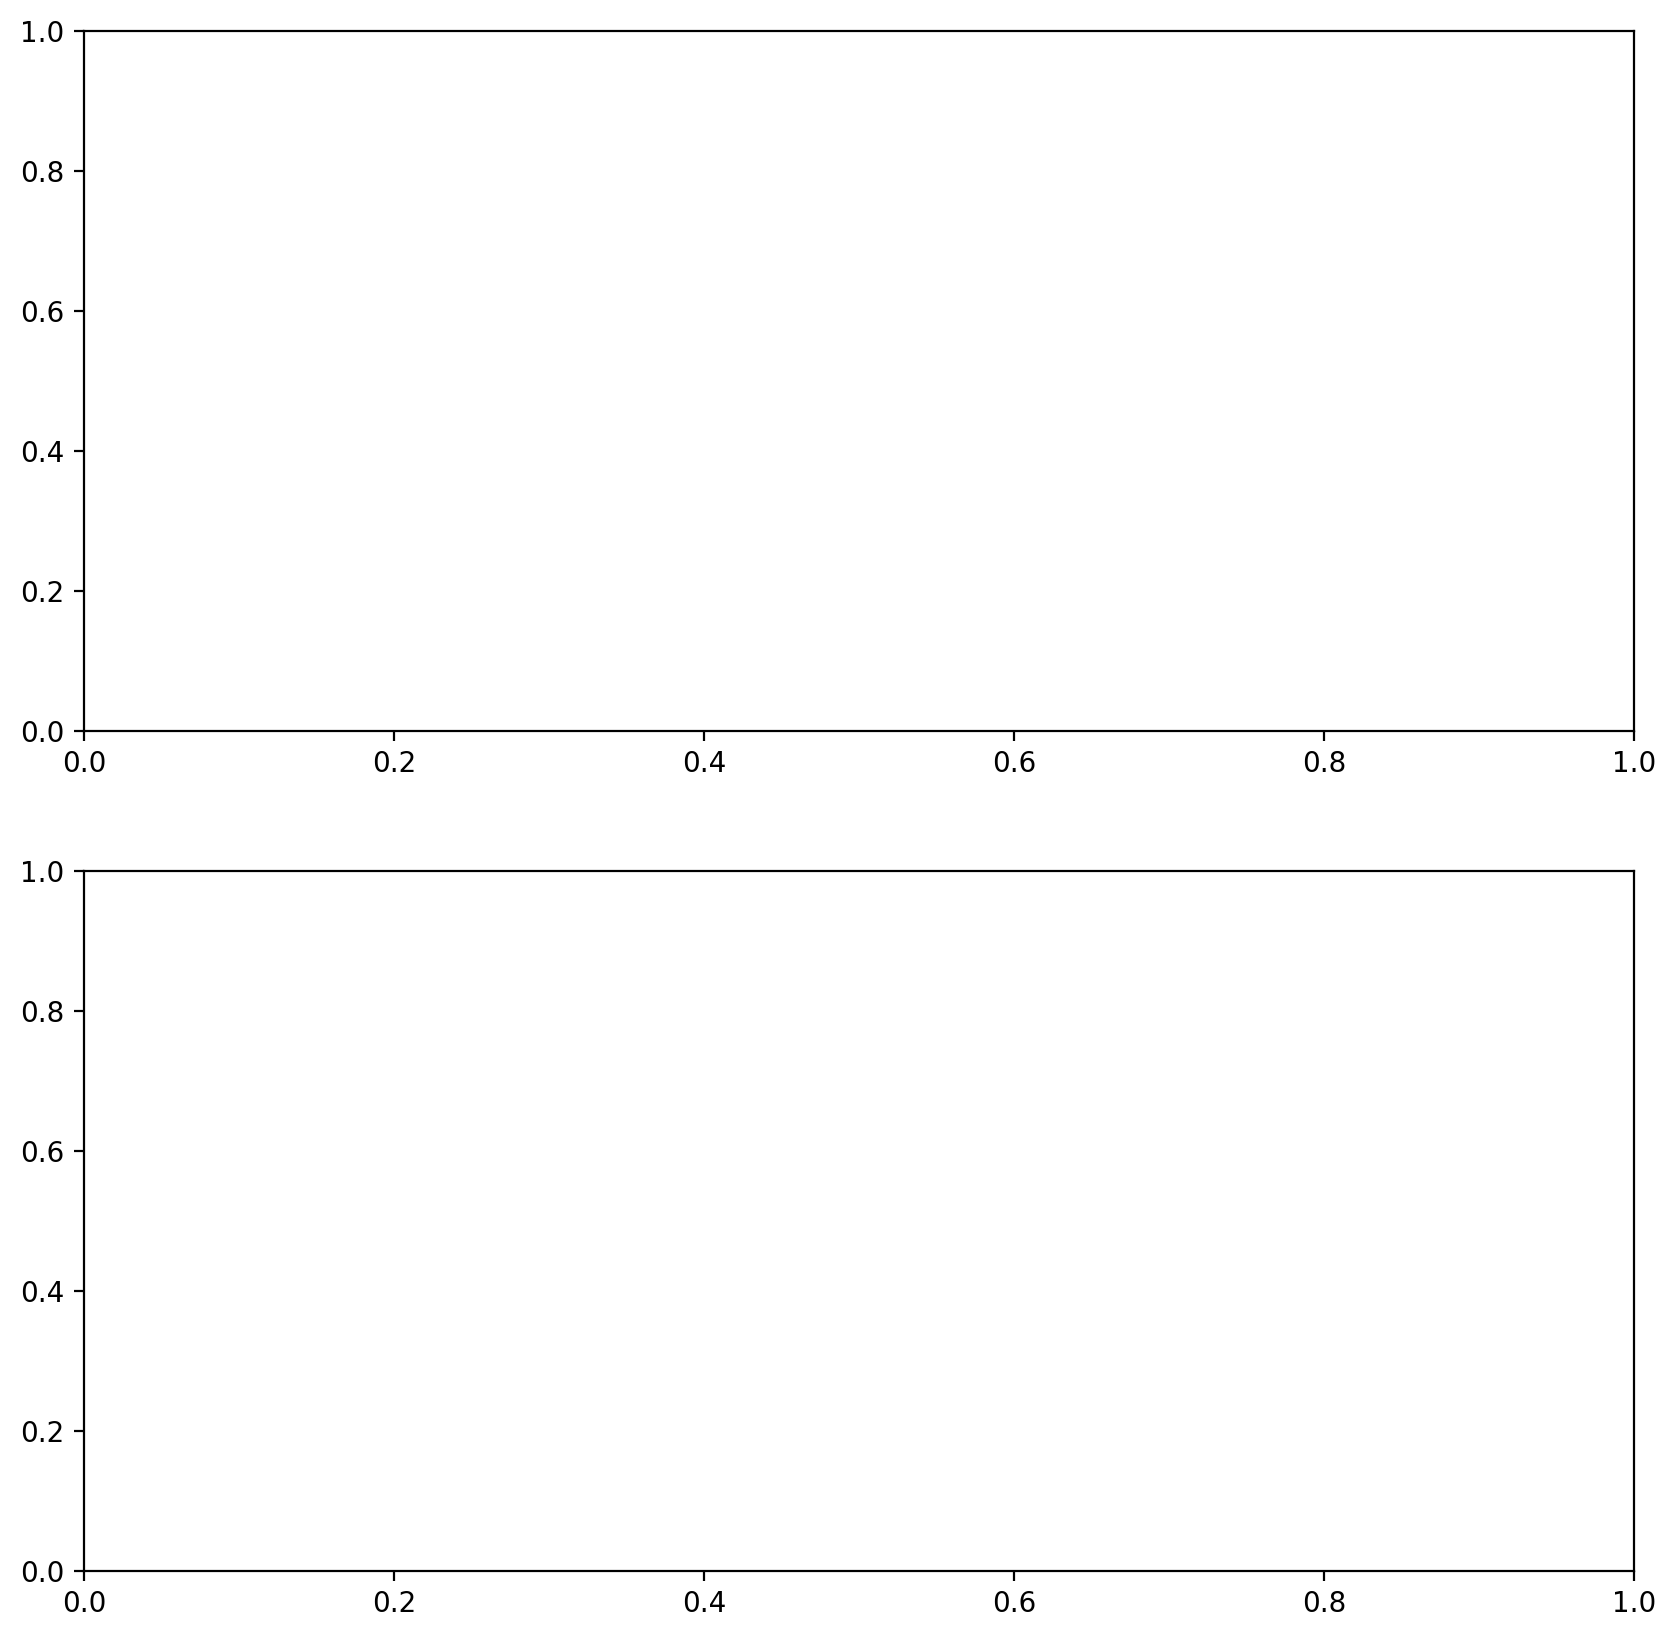

In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Given data dictionaries
data_ethnicity = {"asian": [28.7, 24.0], "black": [34.7, 34.0], "white": [36.7, 42.0]}

data_gender = {"male": [56.0, 56.0], "female": [44.0, 44.0]}

data_prof = {"high prof.": [52.0, 48.0], "limited prof.": [48.0, 52.0]}

# Convert dictionaries to DataFrames
df_ethnicity = pd.DataFrame(data_ethnicity)
df_gender = pd.DataFrame(data_gender)
df_prof = pd.DataFrame(data_prof)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plotting for the ethnicity with a small gap
categories = [df_ethnicity, df_gender, df_prof]
legend_labels = []

for idx, ax in enumerate(axes):
    for pos, data in enumerate(categories[idx].T.iterrows()):
        cumwidth = 0
        category = categories[idx]

        hue_shift = (pos + 1) / len(categories[idx])  # Adjust the hue shift based on the category position
        colors = sns.color_palette("husl", len(category.columns))
        adjusted_colors = [((color[0] + hue_shift) % 1, color[1], color[2]) for color in colors]

        for i, value in enumerate(data):
            value = value[1].values[idx]  # Take the value based on idx
            ax.barh(pos, value, left=cumwidth, color=adjusted_colors[i], height=0.8)

            if value > 5:
                # Add data labels
                width = value
                ax.text(
                    cumwidth + width / 2,
                    pos,
                    "{:.1f}".format(value),
                    ha="center",
                    va="center",
                    color="white",
                    fontweight="bold",
                )

            ax.set_yticks([])
            ax.set_xticks([])
            cumwidth += value

            legend_labels.append(category.columns[i])

# Set labels and title for the first subplot
axes[0].set_title("First Numbers")
axes[0].set_xlabel("Percentage")
axes[0].set_yticks(range(len(categories[0])))
axes[0].set_yticklabels(category_labels)

# Set labels and title for the second subplot
axes[1].set_title("Second Numbers")
axes[1].set_xlabel("Percentage")
axes[1].set_yticks(range(len(categories[0])))
axes[1].set_yticklabels(category_labels)

# Add legend for the first subplot
axes[0].legend(legend_labels, loc="lower center", ncol=len(legend_labels), bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()

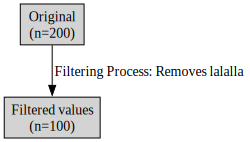

In [343]:
import graphviz

# Create Digraph object
dot = graphviz.Digraph()

# Define nodes (edgy nodes)
dot.node(name="A", label="Original\n (n=200)", style="filled", shape="box")
dot.node(name="B", label="Filtered values\n (n=100)", style="filled", shape="box")

# Define edges (arrows) with labels
dot.edge("A", "B", label="  Filtering Process: Removes lalalla", labeldistance="10.5")

# Render the graph
dot.render("flow_diagram_edgy_nodes", format="png", cleanup=True)

dot

In [317]:
import matplotlib.pyplot as plt
from PIL import Image

# Save Dot figure to a file
dot.render("dot_figure.png", format="png")

# Convert Dot figure to image
dot_img = Image.open("dot_figure.png")

# Create subplots for both figures
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Plot Dot figure
axes[0].imshow(dot_img)
axes[0].axis("off")

# Plot Matplotlib figure with barplots
# Assuming `fig` contains your Matplotlib figure with barplots
axes[1].imshow(fig.canvas.renderer._renderer)
axes[1].axis("off")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

UnidentifiedImageError: cannot identify image file 'dot_figure.png'